<a href="https://colab.research.google.com/github/yassmin1/Deep_Learning/blob/main/airline_sentiment_tweets_classificaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter US Airline Sentiment Analysis

![](https://th.bing.com/th/id/OIP.WBNcDTroP2jGdWmKCyV5kAHaE8?w=262&h=180&c=7&r=0&o=5&pid=1.7)

# **Data Description**:

- A sentiment analysis job about the problems of each major U.S. airline.
- Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

# **Dataset**:

- The project is from a dataset from Kaggle.
- Link to the Kaggle project site:https://www.kaggle.com/crowdflower/twitter-airline-sentiment
- The dataset has to be downloaded from the above Kagglewebsite.

# **Objective**:

- To classify the sentiment of tweets into the positive, neutral & negative.


### Importing the necessary libraries

In [ ]:
# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.
from tqdm import tqdm
import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.
import seaborn as sns                                   # Import seaborn
import matplotlib.pyplot as plt                         # Import Matplotlib

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
from wordcloud import WordCloud,STOPWORDS               # Import WorldCloud and Stopwords
from sklearn.feature_extraction.text import CountVectorizer # Import count Vectorizer
from sklearn.model_selection import train_test_split    # Import train test split
from sklearn.ensemble import RandomForestClassifier     # Import Rndom Forest Classifier
from sklearn.model_selection import cross_val_score     # Import cross val score
from sklearn.metrics import confusion_matrix            # Import confusion matrix
from wordcloud import WordCloud                         # Import Word Cloud
from sklearn.feature_extraction.text import TfidfVectorizer # Import Tf-Idf vector
import nltk
from sklearn import metrics
nltk.download('omw-1.4')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.5 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html

    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

### Reading the dataset

In [ ]:
# Mount Google drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DL_NLP/project/Tweets.csv")

### Checking the shape of the dataset

In [ ]:
data.shape

(14640, 15)

### Displaying the first few rows of the dataset

In [ ]:
data.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Checking for missing values

In [ ]:
data.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

### Function to create labeled barplots

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Percentage of tweets for each airline

---



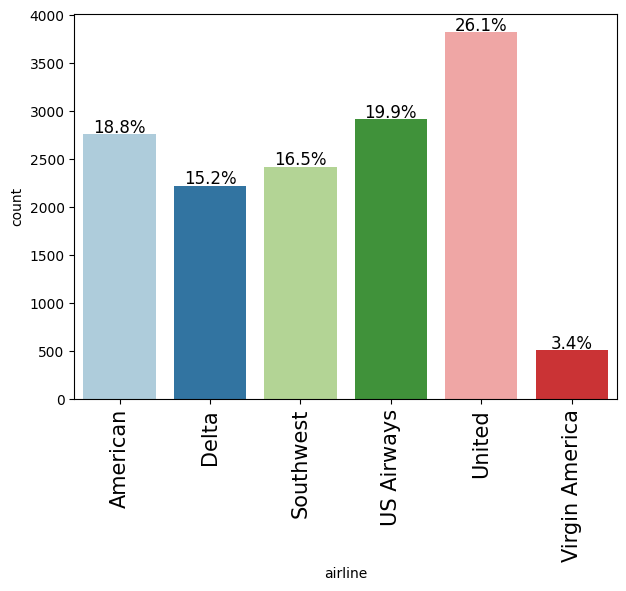

In [ ]:
labeled_barplot(data, "airline", perc=True)

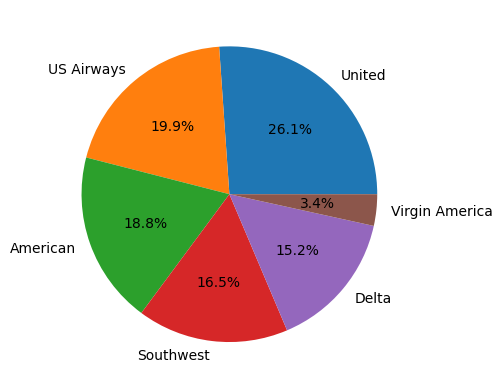

In [ ]:
plt.pie(data.airline.value_counts(normalize=True),autopct='%1.1f%%',labels=data.airline.value_counts(normalize=True).index
        #,explode={0,0,0,0,0}
        )  ;


#### insights
From the plot, we can see that United Airlines has the most number of tweets, followed by American Airlines, Delta Air Lines, Southwest Airlines and US Airways.

#### Distribution of sentiments across all the tweets

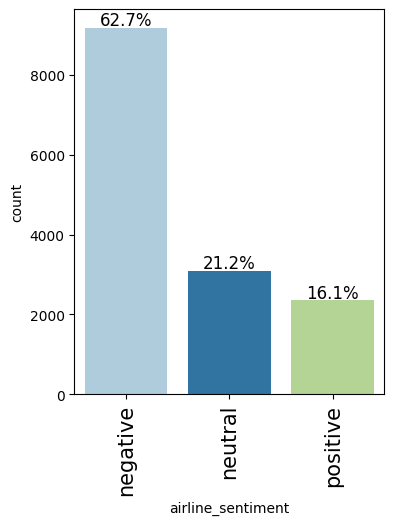

In [ ]:
labeled_barplot(data, "airline_sentiment", perc=True)



In [ ]:
# prompt: generate a title for previous image


#### insights

The bar plot shows that the majority of the tweets are negative, followed by positive tweets and neutral tweets.

#### Distribution of Sentiment of tweets for each airline

Text(0.5, 1.0, 'Distribution of Sentiment of tweets for each airline')

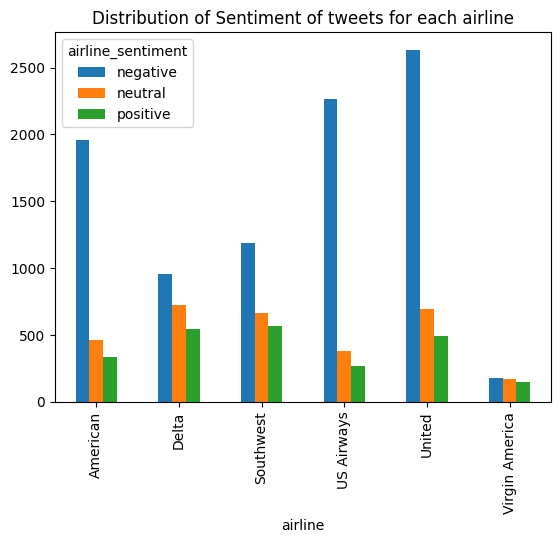

In [ ]:
airline_sentiment =  data.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')
plt.title("Distribution of Sentiment of tweets for each airline")

#### Insights:


- There are more negative tweets than positive and neutral tweets for all airlines.   
- Most of the negative tweets are from United Airlines, followed by American Airlines, Delta Air Lines, Southwest Airlines and US Airways.   
- Most of the positive tweets are from Southwest Airlines, followed by United Airlines, Delta Air Lines, American Airlines and US Airways.

#### Plot of all the negative reasons

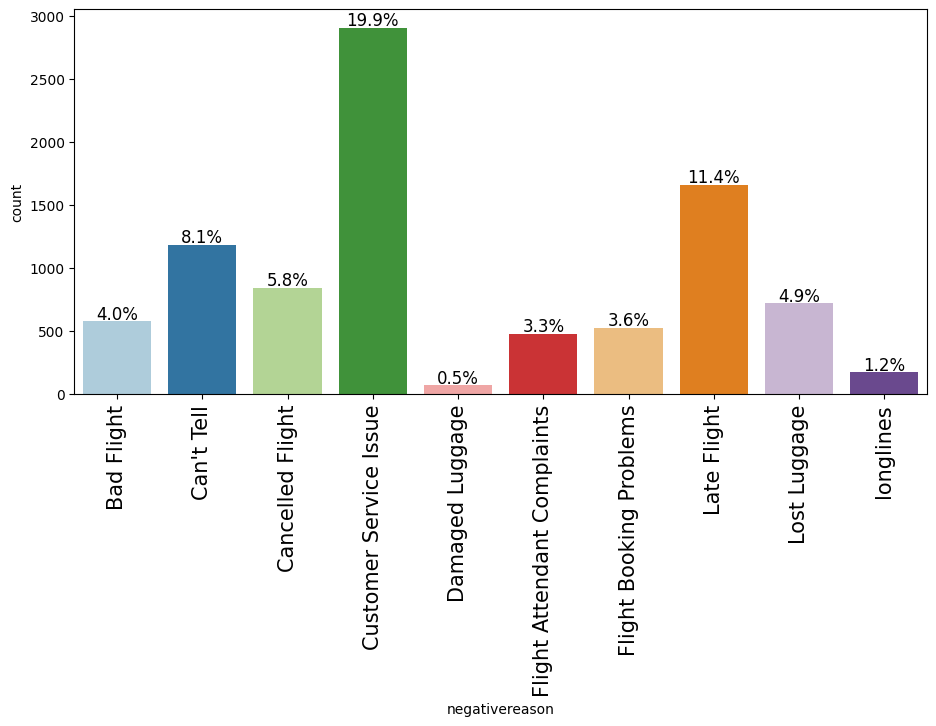

In [ ]:
labeled_barplot(data, "negativereason", perc=True)

### Insight

From the plot, we can see that the majority of the tweets are negative, with the top negative reasons being 'late flight', 'bad customer service' and 'rude staff'.

### Word Cloud for the negative Tweets

In [ ]:
airline_tweets=data[data['airline_sentiment']=='negative']          #
words = ' '.join(airline_tweets['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

In [ ]:
wordcloud = WordCloud(stopwords= STOPWORDS.union(['flight','flights','will','now','amp','u','hour']),                        # Complete the code to apply stopwords on cleaned words
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

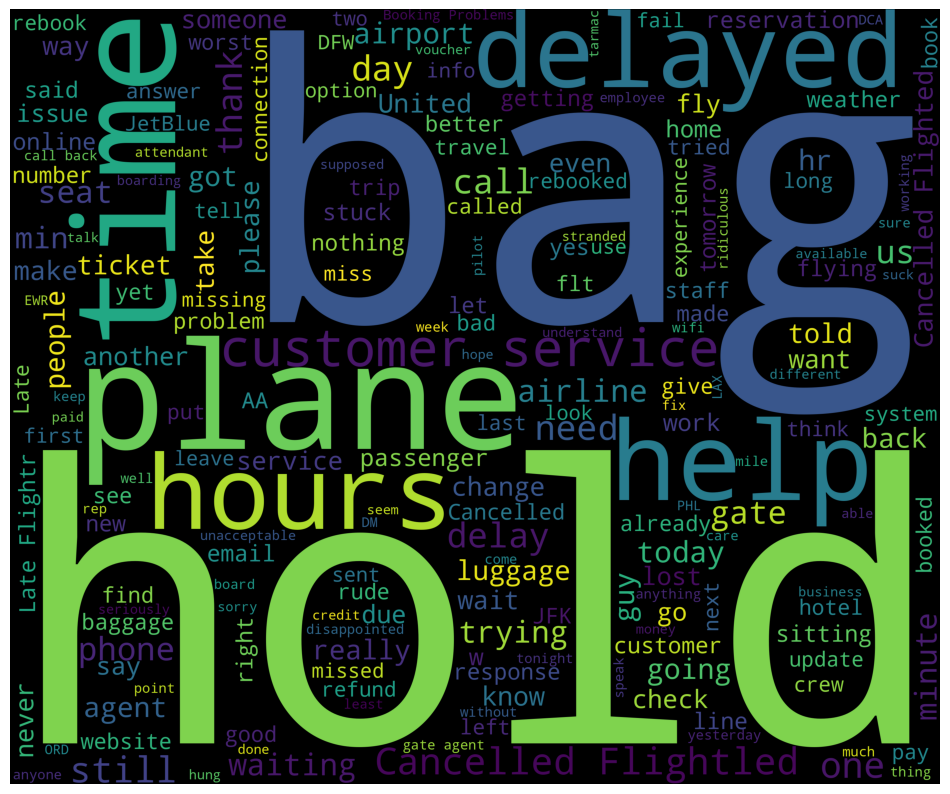

In [ ]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)                                           #
plt.axis('off')
plt.show()

### Wordcloud for positive reasons

In [ ]:
airline_tweets=data[data['airline_sentiment']=='positive']
words = ' '.join(airline_tweets['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS.union(['flight','got','will','u','flights','amp','hour','made']),                          # Complete the code to apply stopwords on cleaned words
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

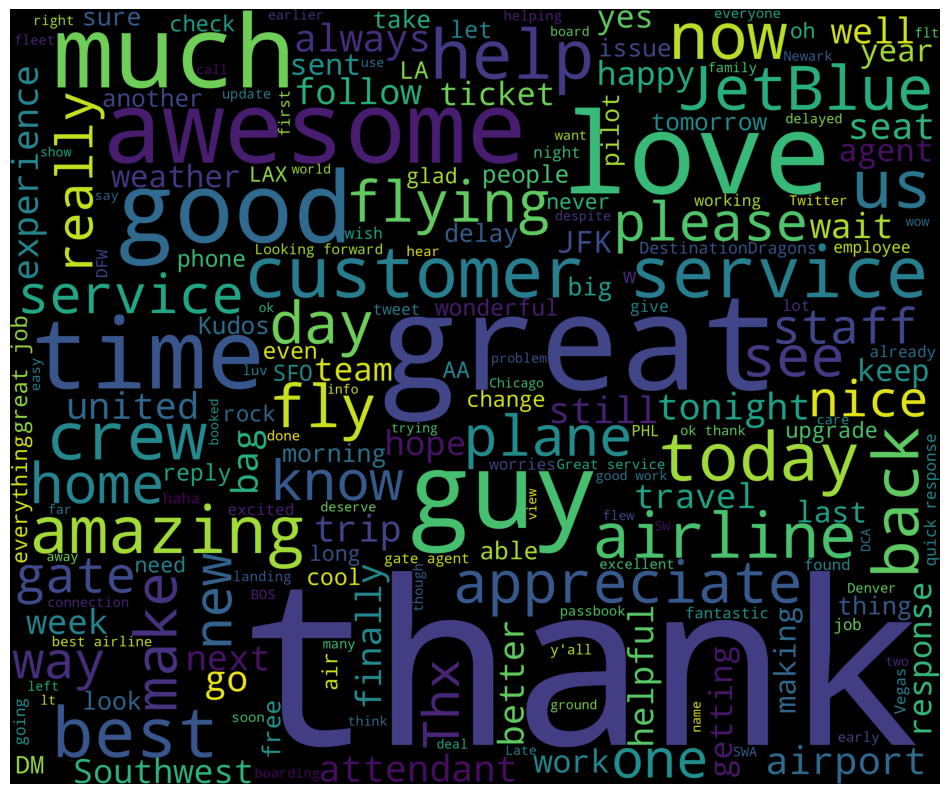

In [ ]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Insight

For the negative wordcloud, we can see that the most common words are "flight", "late", "cancelled", and "delay". These words are all related to the negative experience of flying. The word "airline" is also a common word, which suggests that people are often venting their frustrations about airlines on Twitter.

For the positive wordcloud, we can see that the most common words are "love", "great", "happy", and "thanks". These words are all related to positive experiences of flying. The word "airline" is also a common word, which suggests that people are often expressing their appreciation for airlines on Twitter.

### Subsetting the data (Taking the columns which are relevant for sentiment classification)

In [ ]:
# Take test and airline sentiment columns from the data
data = data[['text', 'airline_sentiment']]

In [ ]:
pd.set_option('display.max_colwidth', None)

data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [ ]:
data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
data['airline_sentiment'].values                                       #

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'negative',
       'neutral'], dtype=object)

### Data Pre-processing:

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data
- We have used NLTK library to tokenize words , remove stopwords and lemmatize the remaining words.

#### Remove HTML Tages

In [ ]:
# Code to remove the html tage
def strip_html(text):
    soup = BeautifulSoup(text, 'html.parser')                          #
    return soup.get_text()

data['text'] = data['text'].apply(strip_html)                        #
data.head()                                                          #

<ipython-input-26-f915efecb767>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')                          # Complete the code to remove html tags


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


#### Replace contractions in string

In [ ]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(replace_contractions)                  #
data.head()                                                          #

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


#### Remove numbers

In [ ]:
def remove_numbers(text):
  text = re.sub('\\d','',text)                                     #
  return text

data['text'] = data['text'].apply(remove_numbers)                  #
data.head()                                                          #

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


#### Apply Tokenization

In [ ]:
# apply tokenization on text column
data['text'] = data.apply(lambda row: word_tokenize(row['text']), axis=1)
data.head()                                                          #

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


#### Apply Stopwords

In [ ]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))

In [ ]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercials experience tacky,positive
2,virginamerica not today must mean need take another trip,neutral
3,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,negative
4,virginamerica really big bad thing,negative


#Build the model based on countvectorizer and Random forest
### Countvectorizer:
CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors.

> Indented block


the output of the Countvetorizer will convert to array and it will be the independted features of the choosen model. while the depended variable will be the airline sentements

In [ ]:
data['text'].shape

(14640,)

In [ ]:
# Vectorization (Convert text data to numbers).

Count_vec = CountVectorizer(max_features=5000)
data_features = Count_vec.fit_transform(data['text'])
data_features = data_features.toarray()

In [ ]:
data_features.shape

(14640, 5000)

#### Store Independent and Dependent variables

In [ ]:
X = data_features                                             #
y = data.airline_sentiment                                           #

In [ ]:
data_features[1]

array([0, 0, 0, ..., 0, 0, 0])

#### Split the data into train and test

In [ ]:
# Split data into training and testing set.

X_train, X_test, y_train, y_test =train_test_split (X, y, test_size=0.2, random_state=42)   #

#### Random Forest Model

In [ ]:
# Using Random Forest to build model for the classification of reviews.

forest = RandomForestClassifier(n_estimators=10, n_jobs=10)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, X_train, y_train, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=10)
0.7453027953704863


#### Optimize the parameter: The number of trees in the random forest model(n_estimators)

In [ ]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(20, 50)]

In [ ]:
# K-Fold Cross - validation .
cv_scores = []                                                                             #
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b,n_jobs=10)                                                #
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')          #
    cv_scores.append(scores.mean())                                                        #

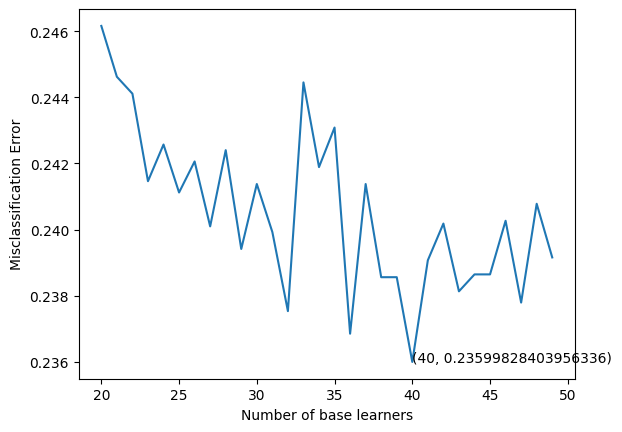

In [ ]:
# plot the error as k increases
error = [1 - x for x in cv_scores]                                 #
optimal_learners = base_ln[error.index(min(error))]                #
plt.plot(base_ln, error)                                           #
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# Train the best model and calculating accuracy on test data .
clf_bw = RandomForestClassifier(n_estimators = xy[0],class_weight='balanced',n_jobs=10)                     #
clf_bw.fit(X_train, y_train)                                               #
clf_bw.score(X_train, y_train)                                               #

0.9941086065573771

In [ ]:
# Predict the result for test data using the model built above.
result = clf_bw.predict(X_test)

In [ ]:
# Print and plot Confusion matirx

conf_bw = confusion_matrix(y_test, result,normalize=None)                       #
print(conf_bw)                                                   #

[[1718  140   31]
 [ 238  289   53]
 [ 109   70  280]]


In [ ]:

cr_bw=metrics.classification_report(y_test,result)     #
print(cr_bw)

              precision    recall  f1-score   support

    negative       0.83      0.91      0.87      1889
     neutral       0.58      0.50      0.54       580
    positive       0.77      0.61      0.68       459

    accuracy                           0.78      2928
   macro avg       0.73      0.67      0.70      2928
weighted avg       0.77      0.78      0.77      2928



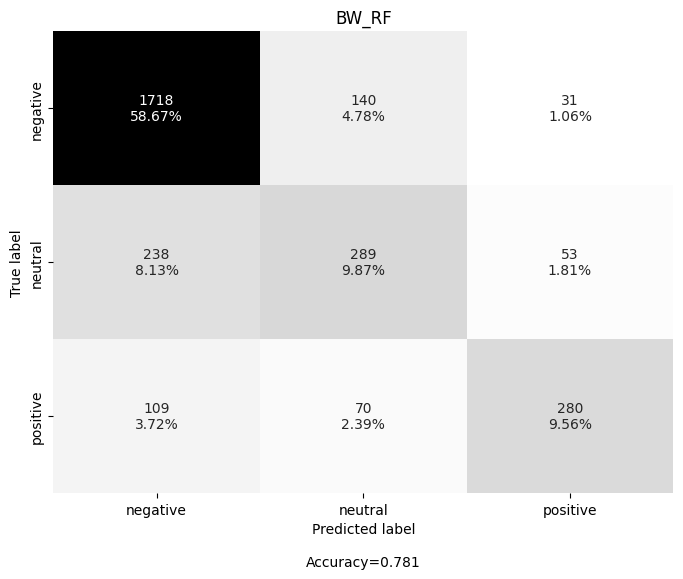

In [ ]:

labels = ['True Neg','False Pos','False Neg','True Pos']
category=[ 'negative', 'neutral','positive']
make_confusion_matrix(conf_bw,group_names=labels,figsize=(8,6), cbar=False,categories=category,cmap='binary',title='BW_RF')

**Wordcloud of top 20 important features from countvectorizer+Randomforest based mode**

In [ ]:
all_features = Count_vec.get_feature_names_out()                     #
top_features=''                                                  #
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','

print(top_features)

print(" ")
print(" ")

# Complete the code by applying wordcloud on top features
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000,height=1000).generate(top_features)

thank,not,great,jetblue,unite,southwestair,usairways,flight,americanair,delay,http,love,cancel,hours,get,hold,awesome,bag,wait,service,virginamerica,call,amaze,hour,best,fly,need,please,customer,time,appreciate,good,make,dm,airline,help,worst,much,guy,plane,
 
 


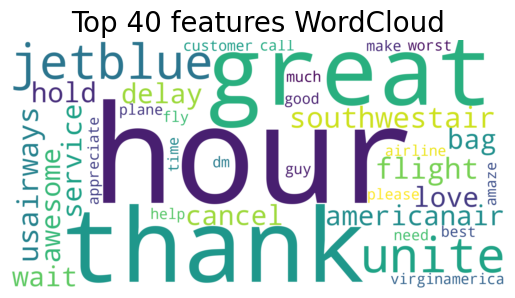

In [ ]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

# Term Frequency(TF) - Inverse Document Frequency(IDF)
Term Frequency-Inverse Document Frequency (TF-IDF) is a statistical measure that evaluates how relevant a word is to a document in a collection of documents1234. It is widely used in natural language processing and information retrieval3. TF-IDF measures how important a term is within a document relative to a collection of documents3. It is calculated by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents1.

In [ ]:
# Using TfidfVectorizer to convert text data to numbers.

tfidf_vect = TfidfVectorizer(max_features=5000)
data_features = tfidf_vect.fit_transform(data['text'])

data_features_idf = data_features.toarray()

In [ ]:
data_features_idf.shape

(14640, 5000)

#### Store Independent and Dependent variables

In [ ]:
X = data_features_idf                                                        #

y = data.airline_sentiment.values                                                      #

#### Split the data into train and test

In [ ]:
# Split data into training and testing set.

X_train, X_test, y_train, y_test =train_test_split (X, y, test_size=0.2, random_state=42)   #

#### Random Forest Model

In [ ]:
# Using Random Forest to build model for the classification of reviews.

forest = RandomForestClassifier(n_estimators=20, n_jobs=10)            #

forest = forest.fit(X_train, y_train)                         #

print(forest)

print(np.mean(cross_val_score(forest, X, y, cv=10)))          #

RandomForestClassifier(n_estimators=20, n_jobs=4)
0.7202868852459016


In [ ]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(20, 50)]

In [ ]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b,n_jobs=10)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

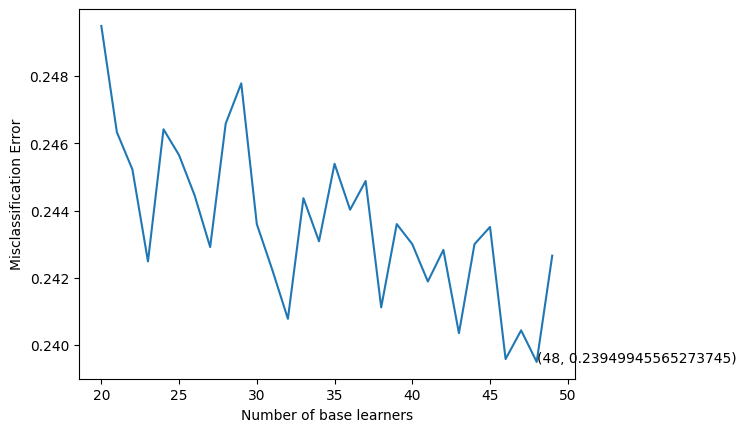

In [ ]:
# plot the error as k increases
error = [1 - x for x in cv_scores]
optimal_learners = base_ln[error.index(min(error))]
plt.plot(base_ln, error)
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
xy[0]

48

In [ ]:
# Train the best model and calculating accuracy on test data .
clf_idf = RandomForestClassifier(n_estimators = xy[0],class_weight='balanced',n_jobs=10)
clf_idf.fit(X_train, y_train)
clf_idf.score(X_train, y_train)

0.9941086065573771

In [ ]:
# Predict the result for test data using the model built above.
result = clf_idf.predict(X_test)

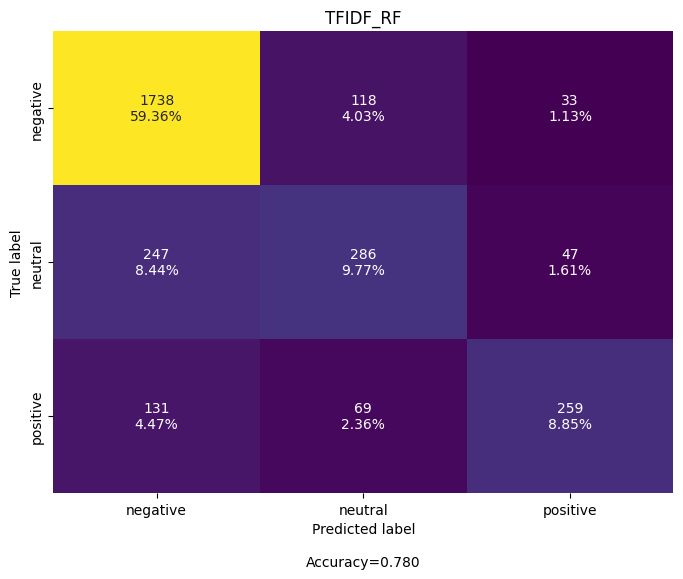

In [ ]:
# Plot the confusion matrix
conf_idf = confusion_matrix(y_test, result)

labels = ['True Neg','False Pos','False Neg','True Pos']
category=[ 'negative', 'neutral','positive']
make_confusion_matrix(conf_idf,group_names=labels,figsize=(8,6), cbar=False,categories=category,cmap='viridis',title='TFIDF_RF')                       # Complete the code to plot the heatmap of the confusion matrix

In [ ]:
from sklearn import metrics
cr=metrics.classification_report(y_test,result)
print(cr)

              precision    recall  f1-score   support

    negative       0.82      0.92      0.87      1889
     neutral       0.60      0.49      0.54       580
    positive       0.76      0.56      0.65       459

    accuracy                           0.78      2928
   macro avg       0.73      0.66      0.69      2928
weighted avg       0.77      0.78      0.77      2928



In [ ]:
all_features = tfidf_vect.get_feature_names_out()
top_features=''
feat=clf_idf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=', '

print(top_features)

print(" ")
print(" ")

# Complete the code by applying wordcloud on top features
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000,height=1000).generate(top_features)

thank, not, great, jetblue, unite, southwestair, usairways, flight, americanair, delay, http, love, cancel, hours, get, hold, awesome, bag, wait, service, virginamerica, call, amaze, hour, best, fly, need, please, customer, time, appreciate, good, make, dm, airline, help, worst, much, guy, plane, 
 
 


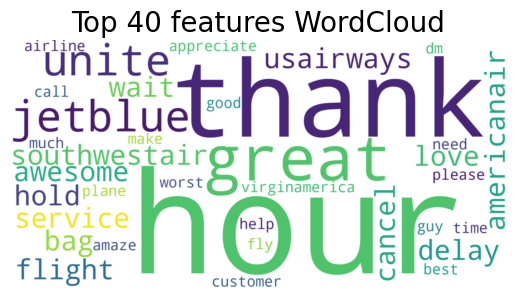

In [ ]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

## Summary:

- We used dataset which has tweets in text format and their sentiment type (positive, negative and neutral).
- The goal was to build a model for **text-classification**.
- We created a custom function to plot labeled barplots.
- We plotted the percentage of public tweets for each airlines.
- We plotted the distribution of sentiment across all the tweets.
- We plotted the distribution of tweets for each airline
- We plotted the distribution of all the negative reason & found that customer service issue & late fight were the major negative sentiment reason
- We plotted the word cloud of positive and negative sentiment tweets.

- We **Pre-processed** the data using variuos techniques and libraries.
- The pre-precessed data is **converted(vectorized)** to numbers, so that we can feed the data in the model.
- After **building the classification** model, we predicted the result for the test data.
- We **trained the model and optimize the parameter** that led to significant increase in the overall accuracy
- After that we saw that using the above techniques, our model performed good in perspective of how the text classification models perform.
- We can **increase the max_feature parameter** in the vectorizer &we can also apply other model and **hyperparameter tuning to increase the overall accuracy**.
- One more way to increase accuracy is to use different variations of Pre-processing techniques.

# word2vec model

In [ ]:
import gensim
print(gensim.__version__)

4.3.2


In [ ]:
words_list =[]

for i in data['text']:

    li = list(i.split(" "))

    words_list.append(li)

In [ ]:
# Model creation
model= gensim.models.Word2Vec(words_list, min_count = 1, workers = 4,vector_size=5000)

In [ ]:
# saving the model
model.save("word2vec.model")

In [ ]:
#The model.wv.key_to_index attribute in Gensim's Word2Vec class is a dictionary
#that maps each word in the vocabulary to its index in the word vector matrix.
#This allows you to easily access the word vector for a given word, or to find
# the index of a word in the vocabulary.
words = model.wv.key_to_index
print(f"length of the words={len(words)}")
print(f"the index of airliens word is {words['airlines']}")

length of the words=11998
the index of airliens word is 152


In [ ]:
# then use this index to access the word vector
#itself using the following code:
print(len(model.wv.vectors[model.wv.key_to_index['airlines']]))
model.wv.vectors[model.wv.key_to_index['airlines']]

5000


array([ 0.05544878, -0.01939582,  0.02707703, ..., -0.05915262,
       -0.08250323,  0.00361243], dtype=float32)

In [ ]:
words = model.wv.key_to_index
wvs = model.wv[words]
print(wvs.shape)


(11998, 5000)


In [ ]:
def average_word_vectors(words, model, vocabulary, num_features):

    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.

    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector

def averaged_word_vectorizer(corpus, model, num_features):

    vocabulary = set(model.wv.key_to_index)

    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]

    return np.array(features)


In [ ]:
feature_size = 5000

# get document level embeddings
w2v_feature_array = averaged_word_vectorizer(corpus = words_list, model = model,
                                             num_features = feature_size)



print(f"shape of w2v feature:{w2v_feature_array.shape}")
#pd.DataFrame(w2v_feature_array)

shape of w2v feature:(14640, 5000)


In [ ]:
X = w2v_feature_array                                             #

y = data.airline_sentiment

In [ ]:
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v =train_test_split (X, y, test_size=0.2, random_state=42)   #

In [ ]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(20, 50)]

In [ ]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b,n_jobs=10)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

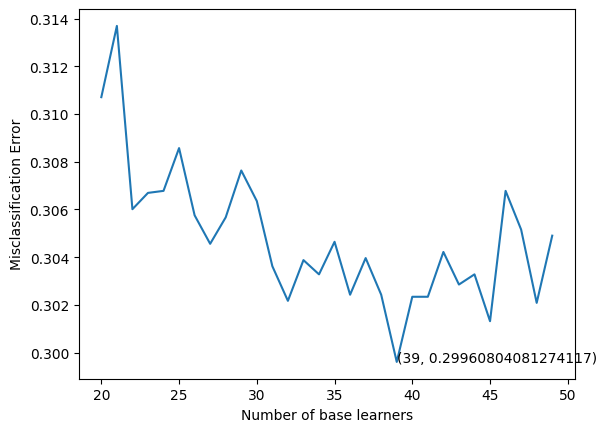

In [ ]:
# plot the error as k increases
error = [1 - x for x in cv_scores]
optimal_learners = base_ln[error.index(min(error))]
plt.plot(base_ln, error)
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
clf_W2V= RandomForestClassifier(n_estimators = xy[0],class_weight='Balanced',n_jobs=10)

In [ ]:
clf_W2V.fit(X_train_w2v, y_train_w2v)                                               #
clf_W2V.score(X_train, y_train)

0.9960724043715847

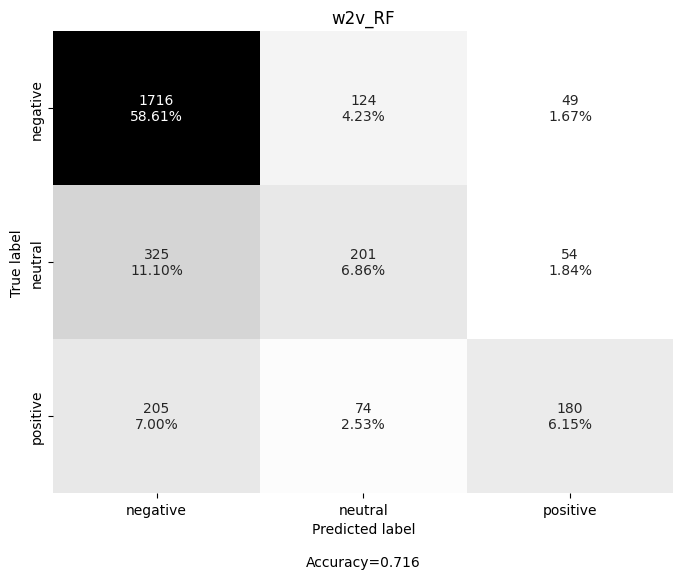

In [ ]:
result = clf_W2V.predict(X_test)
# Plot the confusion matrix
conf_W2V = confusion_matrix(y_test, result)                      #
labels = ['True Neg','False Pos','False Neg','True Pos']
category=[ 'negative', 'neutral','positive']
make_confusion_matrix(conf_W2V,group_names=labels,figsize=(8,6), cbar=False,categories=category,cmap='binary',title='w2v_RF')


# **GloVe Vectors**
Global Vectors for Word Representation, also known as GloVe, is an alternative to Word2vec. Just like Word2vec, it is also an unsupervised learning algorithm that allows us to take a corpus of text, and intuitively map each word in that document into a position in a high-dimensional latent space which gives us the vector representation of the word.

First we convert the GloVe file containing the word embeddings to the word2vec format for convenience of use. We can do it using the gensim library, a function called glove2word2vec.

In [ ]:
!pip install rarfile
from rarfile import RarFile

rarfile_name = "/content/drive/MyDrive/Colab Notebooks/DL_NLP/introduction_NLP/glove.6B.300d.rar"

with RarFile(rarfile_name, "r") as rarfile:
    for file in rarfile.namelist():
        rarfile.extractall(file)
        print( file)


glove.6B.300d.txt


In [ ]:
def average_word_vectors_glove(words, model, vocabulary, num_features):

    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.

    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.get_vector(word))

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector

def averaged_word_vectorizer_glove(corpus, model, num_features):

    vocabulary = set(model.key_to_index)

    features = [average_word_vectors_glove(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]

    return np.array(features)


In [ ]:
%ls -la

total 469072
drwxr-xr-x 1 root root      4096 Oct  5 14:06 ./
drwxr-xr-x 1 root root      4096 Oct  5 13:27 ../
drwxr-xr-x 4 root root      4096 Oct  3 13:25 .config/
drwx------ 5 root root      4096 Oct  5 13:52 drive/
drwxr-xr-x 2 root root      4096 Oct  5 14:08 glove.6B.300d.txt/
drwxr-xr-x 1 root root      4096 Oct  3 13:25 sample_data/
-rw-r--r-- 1 root root    376777 Oct  5 15:51 word2vec.model
-rw-r--r-- 1 root root 239960128 Oct  5 15:51 word2vec.model.syn1neg.npy
-rw-r--r-- 1 root root 239960128 Oct  5 15:51 word2vec.model.wv.vectors.npy


In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
Glove_path='/content/glove.6B.300d.txt/glove.6B.300d.txt'
word2vec_output_file = '/content/glove.6B.300d.txt/glove.6B.300d.txt.word2vec'
glove2word2vec(Glove_path, word2vec_output_file)

<ipython-input-207-f81591447d51>:4: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(Glove_path, word2vec_output_file)


(400000, 300)

In [ ]:
#Use glove2word2vec to convert GloVe vectors in text
# format into the word2vec text format:
#ead the word2vec txt to a gensim model using KeyedVectors
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = '/content/glove.6B.300d.txt/glove.6B.300d.txt.word2vec'
Glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)


In [ ]:
Glove_model.key_to_index#get_vector('airline').shape

{'the': 0,
 ',': 1,
 '.': 2,
 'of': 3,
 'to': 4,
 'and': 5,
 'in': 6,
 'a': 7,
 '"': 8,
 "'s": 9,
 'for': 10,
 '-': 11,
 'that': 12,
 'on': 13,
 'is': 14,
 'was': 15,
 'said': 16,
 'with': 17,
 'he': 18,
 'as': 19,
 'it': 20,
 'by': 21,
 'at': 22,
 '(': 23,
 ')': 24,
 'from': 25,
 'his': 26,
 "''": 27,
 '``': 28,
 'an': 29,
 'be': 30,
 'has': 31,
 'are': 32,
 'have': 33,
 'but': 34,
 'were': 35,
 'not': 36,
 'this': 37,
 'who': 38,
 'they': 39,
 'had': 40,
 'i': 41,
 'which': 42,
 'will': 43,
 'their': 44,
 ':': 45,
 'or': 46,
 'its': 47,
 'one': 48,
 'after': 49,
 'new': 50,
 'been': 51,
 'also': 52,
 'we': 53,
 'would': 54,
 'two': 55,
 'more': 56,
 "'": 57,
 'first': 58,
 'about': 59,
 'up': 60,
 'when': 61,
 'year': 62,
 'there': 63,
 'all': 64,
 '--': 65,
 'out': 66,
 'she': 67,
 'other': 68,
 'people': 69,
 "n't": 70,
 'her': 71,
 'percent': 72,
 'than': 73,
 'over': 74,
 'into': 75,
 'last': 76,
 'some': 77,
 'government': 78,
 'time': 79,
 '$': 80,
 'you': 81,
 'years': 82,
 'i

In [ ]:
#Glove_model.get_vector(words_list)
w2v_feature_array = averaged_word_vectorizer_glove(corpus = words_list, model = Glove_model,
                                             num_features = 300)


In [ ]:
w2v_feature_array.shape

(14640, 300)

In [ ]:
xtrain_glove, xvalid_glove, ytrain, yvalid = train_test_split(w2v_feature_array, y, test_size=0.2, random_state=42,stratify=y)


In [ ]:
print("Shape of Training set : ", xtrain_glove.shape)

print("Shape of test set : ", xvalid_glove.shape)

Shape of Training set :  (11712, 300)
Shape of test set :  (2928, 300)


In [ ]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(20, 50)]

In [ ]:
# K-Fold Cross - validation .
cv_scores = []                                                                             #
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b,n_jobs=10)                                                #
    scores = cross_val_score(clf, xtrain_glove, ytrain, cv = 5, scoring = 'accuracy')          #
    cv_scores.append(scores.mean())                                                        #

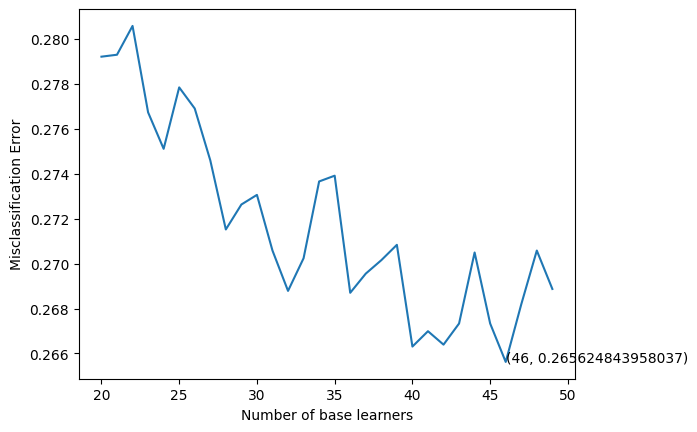

In [ ]:
# plot the error as k increases
error = [1 - x for x in cv_scores]                                 #
optimal_learners = base_ln[error.index(min(error))]                #
plt.plot(base_ln, error)                                           #
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# intializing the Random Forest model
glove = RandomForestClassifier(n_estimators=xy[0],random_state = 42,class_weight='balanced')

# fitting the model on training set
glove.fit(xtrain_glove,ytrain)

RandomForestClassifier(class_weight='balanced', n_estimators=46,
                       random_state=42)

In [ ]:
result=glove.predict(xvalid_glove)


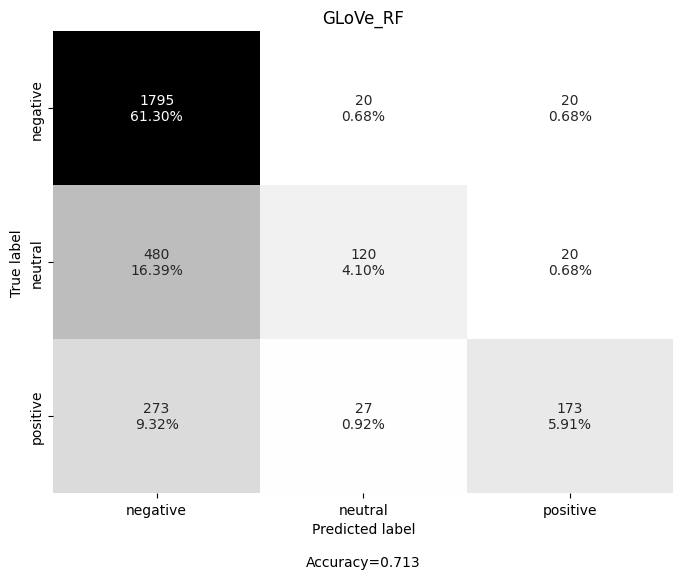

In [ ]:
conf_glove = confusion_matrix(yvalid, result)
category=[ 'negative', 'neutral','positive']
make_confusion_matrix(conf_glove,group_names=labels,figsize=(8,6), cbar=False,categories=category,cmap='binary',title='GLoVe_RF')


In [ ]:
print(metrics.classification_report(yvalid, result))

              precision    recall  f1-score   support

    negative       0.70      0.98      0.82      1835
     neutral       0.72      0.19      0.30       620
    positive       0.81      0.37      0.50       473

    accuracy                           0.71      2928
   macro avg       0.75      0.51      0.54      2928
weighted avg       0.72      0.71      0.66      2928



# FastText

In [ ]:
from gensim.models.fasttext import load_facebook_model
from gensim.models import FastText, KeyedVectors
model_fasttext = FastText(words_list, vector_size=300, min_count=1, workers=4,sg=1)





In [ ]:
model_fasttext.wv.most_similar("airline")

[('airlineguys', 0.9964825510978699),
 ('airliner', 0.9947735071182251),
 ('airlines', 0.9940160512924194),
 ('airlinegave', 0.9909104108810425),
 ('airlinegeeks', 0.9849241375923157),
 ('badairline', 0.9828689098358154),
 ('byebyeusairline', 0.9826951622962952),
 ('evn', 0.9818923473358154),
 ('airlineadviser', 0.9803318977355957),
 ('worstairline', 0.9777970314025879)]

In [ ]:
feature_size = 300

# get document level embeddings
FT_feature_array = averaged_word_vectorizer(corpus = words_list, model = model_fasttext,
                                             num_features = feature_size)



print(f"shape of fasttext feature:{FT_feature_array.shape}")
#pd.DataFrame(FT_feature_array)

shape of fasttext feature:(14640, 300)


In [ ]:
X = FT_feature_array                                             #
y = data.airline_sentiment

In [ ]:
Xtrain_TF, Xtest_TF, ytrain_TF, ytest_TF =train_test_split (X, y, test_size=0.2, random_state=42)

In [ ]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(20,50)]

In [ ]:
# K-Fold Cross - validation .
cv_scores = []                                                                             #
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b,n_jobs=10)                                                #
    scores = cross_val_score(clf, Xtrain_TF, ytrain_TF, cv = 5, scoring = 'accuracy')          #
    cv_scores.append(scores.mean())                                                        #

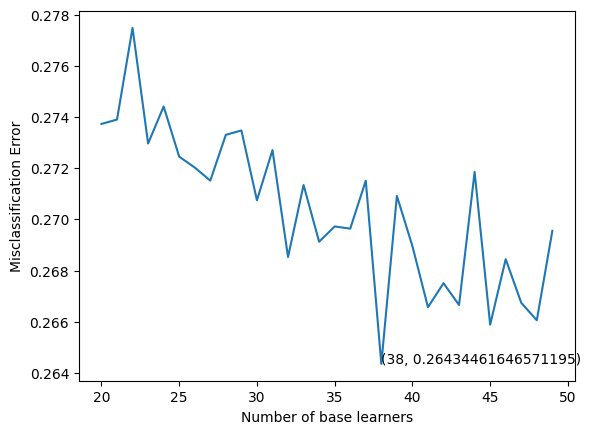

In [ ]:
# plot the error as k increases
error = [1 - x for x in cv_scores]                                 #
optimal_learners = base_ln[error.index(min(error))]                #
plt.plot(base_ln, error)                                           #
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# intializing the Random Forest model
TF = RandomForestClassifier(n_estimators=xy[0],random_state = 24,class_weight='balanced')

# fitting the model on training set
TF.fit(Xtrain_TF,ytrain_TF)

RandomForestClassifier(class_weight='balanced', n_estimators=38,
                       random_state=24)

In [ ]:
result=TF.predict(Xtest_TF)


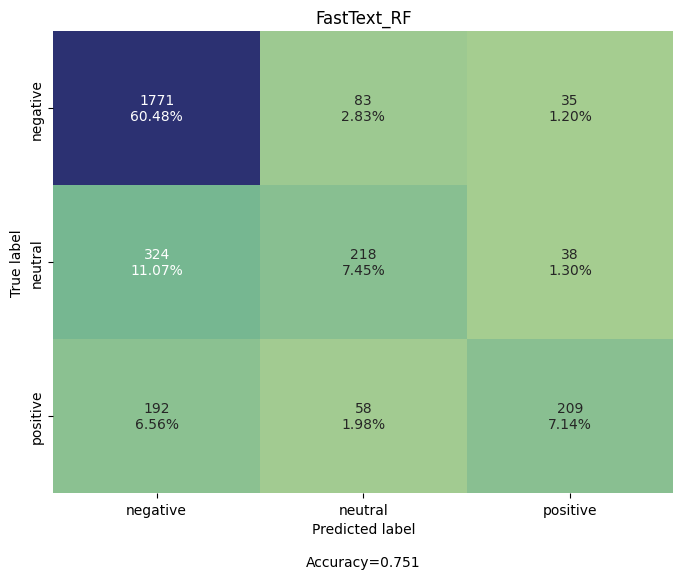

In [ ]:
conf_TF = confusion_matrix(ytest_TF, result)
labels = ['True Neg','False Pos','False Neg','True Pos']
category=[ 'negative', 'neutral','positive']
make_confusion_matrix(conf_TF,group_names=labels,figsize=(8,6), cbar=False,categories=category,cmap='crest',title='FastText_RF')


In [ ]:
cr_bw=metrics.classification_report(ytest_TF, result)
print(cr_bw)

              precision    recall  f1-score   support

    negative       0.77      0.94      0.85      1889
     neutral       0.61      0.38      0.46       580
    positive       0.74      0.46      0.56       459

    accuracy                           0.75      2928
   macro avg       0.71      0.59      0.63      2928
weighted avg       0.74      0.75      0.73      2928



# Dealing with implanced dataset:
After choosing the winner model we apply
 resampling methods

In [ ]:
tfidf_vect = TfidfVectorizer(max_features=5000)
data_features = tfidf_vect.fit_transform(data['text'])
data_features_idf = data_features.toarray()
X = data_features_idf                                                        #
y = data.airline_sentiment.values


In [ ]:
# Vectorization (Convert text data to numbers).

Count_vec = CountVectorizer(max_features=5000)
data_features = Count_vec.fit_transform(data['text'])
data_features = data_features.toarray()
X = data_features                                             #
y = data.airline_sentiment

In [ ]:
X_train, X_test, y_train, y_test =train_test_split (X, y, test_size=0.2, random_state=42)   #                       #

# Undersampling

In [ ]:
from imblearn.under_sampling import NearMiss,RandomUnderSampler,TomekLinks,AllKNN
#rus = RandomUnderSampler()
rus=AllKNN()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [ ]:
from collections import Counter
print(Counter(y_train))

print(Counter(y_rus))

Counter({'negative': 7289, 'neutral': 2519, 'positive': 1904})
Counter({'negative': 3770, 'positive': 1904, 'neutral': 1652})


In [ ]:
base_ln = [x for x in range(20, 50)]

In [ ]:
# K-Fold Cross - validation .
cv_scores = []                                                                             #
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b,n_jobs=10)                                                #
    scores = cross_val_score(clf, X_rus, y_rus, cv = 5, scoring = 'accuracy')          #
    cv_scores.append(scores.mean())                                                        #

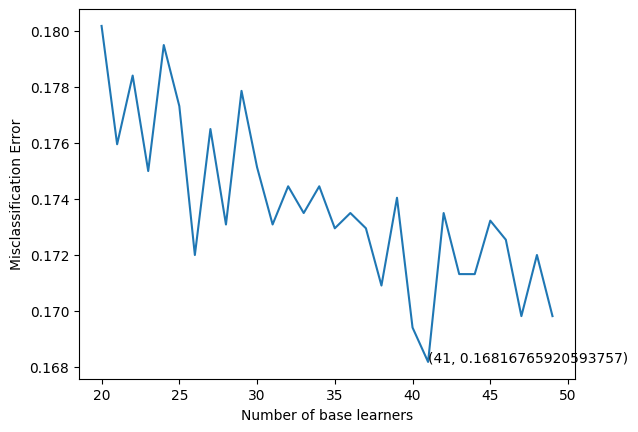

In [ ]:
# plot the error as k increases
error = [1 - x for x in cv_scores]                                 #
optimal_learners = base_ln[error.index(min(error))]                #
plt.plot(base_ln, error)                                           #
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
clf_idf_smot = RandomForestClassifier(n_estimators = xy[0],class_weight='balanced',random_state = 24,n_jobs=10)                                                #
#
clf_idf_smot.fit(X_rus, y_rus)
clf_idf_smot.score(X_rus, y_rus)

0.997952497952498

In [ ]:
result = clf_idf_smot.predict(X_test)


In [ ]:
# Predict the result for test data using the model built above.
result = clf_idf_smot.predict(X_test)

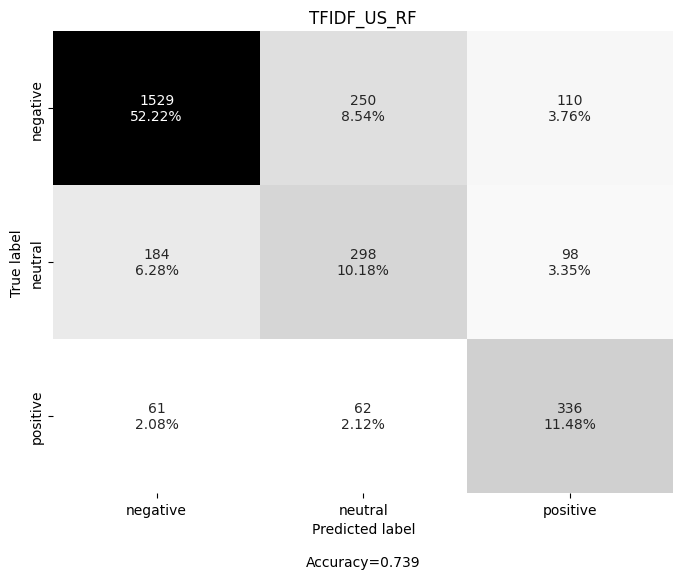

In [ ]:
# Plot the confusion matrix
conf_idf_smot = confusion_matrix(y_test, result)

labels = ['True Neg','False Pos','False Neg','True Pos']
category=[ 'negative', 'neutral','positive']
make_confusion_matrix(conf_idf_smot,group_names=labels,figsize=(8,6), cbar=False,categories=category,cmap='binary',title='TFIDF_US_RF')

In [ ]:
print(metrics.classification_report(y_test, result))

              precision    recall  f1-score   support

    negative       0.86      0.81      0.83      1889
     neutral       0.49      0.51      0.50       580
    positive       0.62      0.73      0.67       459

    accuracy                           0.74      2928
   macro avg       0.66      0.69      0.67      2928
weighted avg       0.75      0.74      0.74      2928



# Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler,SMOTE

ros=SMOTE(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [ ]:
# K-Fold Cross - validation .
base_ln = [x for x in range(20, 50)]
cv_scores = []                                                                             #
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b,n_jobs=10)                                                #
    scores = cross_val_score(clf, X_ros, y_ros, cv = 5, scoring = 'accuracy')          #
    cv_scores.append(scores.mean())

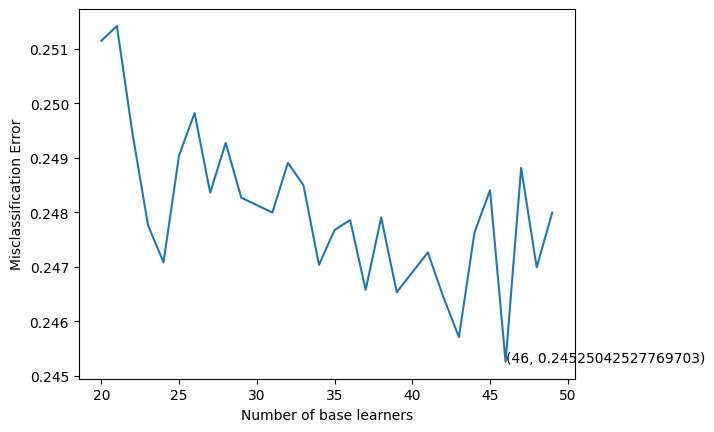

In [ ]:
# plot the error as k increases
error = [1 - x for x in cv_scores]                                 #
optimal_learners = base_ln[error.index(min(error))]                #
plt.plot(base_ln, error)                                           #
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
clf_idf_smot = RandomForestClassifier(n_estimators = xy[0],class_weight='balanced',random_state = 24,n_jobs=10)                     #
clf_idf_smot.fit(X_ros, y_ros)                                               #
clf_idf_smot.score(X_ros, y_ros)

0.8994375085745644

In [ ]:
result = clf_idf_smot.predict(X_test)                                   #


In [ ]:
# Predict the result for test data using the model built above.
result = clf_idf_smot.predict(X_test)

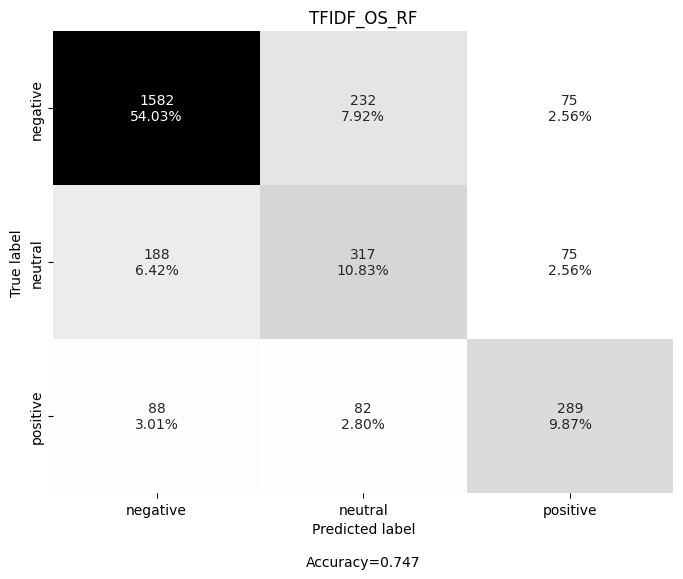

In [ ]:
## Plot the confusion matrix
conf_idf_smot = confusion_matrix(y_test, result)                      #

labels = ['True Neg','False Pos','False Neg','True Pos']
category=[ 'negative', 'neutral','positive']
make_confusion_matrix(conf_idf_smot,group_names=labels,figsize=(8,6), cbar=False,categories=category,cmap='binary',title='TFIDF_OS_RF')                       # Complete the code to plot the heatmap of the confusion matrix

In [ ]:
print(metrics.classification_report(y_test, result))

              precision    recall  f1-score   support

    negative       0.85      0.84      0.84      1889
     neutral       0.50      0.55      0.52       580
    positive       0.66      0.63      0.64       459

    accuracy                           0.75      2928
   macro avg       0.67      0.67      0.67      2928
weighted avg       0.75      0.75      0.75      2928



#  under and over sampling together.




In [ ]:
from imblearn.combine import SMOTETomek

smt=SMOTETomek(random_state=42)
X_smt, y_smt = smt.fit_resample(X_train, y_train)

In [ ]:
# K-Fold Cross - validation .
base_ln = [x for x in range(20, 50)]
cv_scores = []                                                                             #
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b,n_jobs=10)                                                #
    scores = cross_val_score(clf, X_smt, y_smt, cv = 5, scoring = 'accuracy')          #
    cv_scores.append(scores.mean())

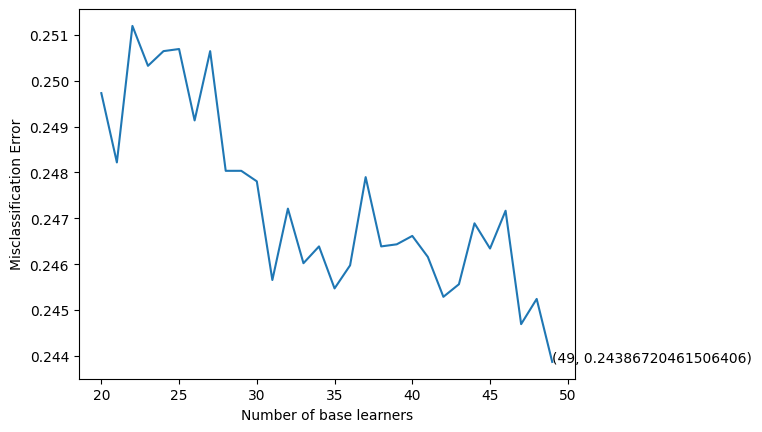

In [ ]:
# plot the error as k increases
error = [1 - x for x in cv_scores]                                 #
optimal_learners = base_ln[error.index(min(error))]                #
plt.plot(base_ln, error)                                           #
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
clf_idf_smot = RandomForestClassifier(n_estimators = xy[0],class_weight='balanced',random_state = 24,n_jobs=10)                     #
clf_idf_smot.fit(X_smt, y_smt)                                               #
clf_idf_smot.score(X_smt, y_smt)

0.8992532184908599

In [ ]:
# Predict the result for test data using the model built above.
result = clf_idf_smot.predict(X_test)

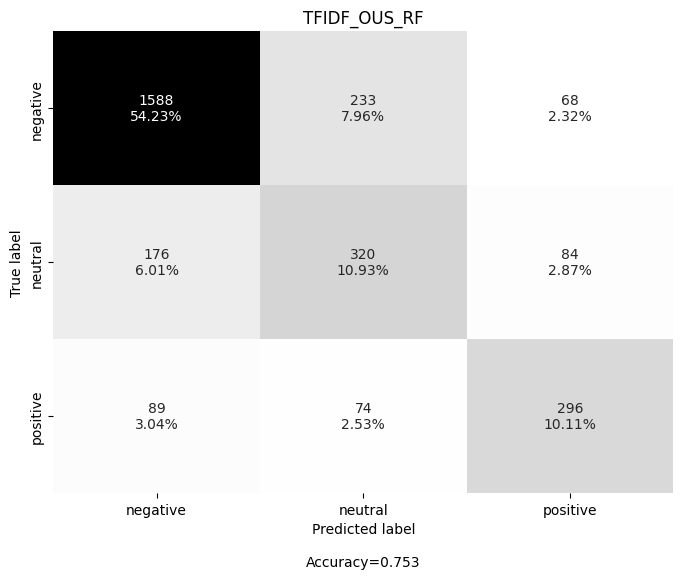

In [ ]:
## Plot the confusion matrix
conf_idf_smot = confusion_matrix(y_test, result)                      #

labels = ['True Neg','False Pos','False Neg','True Pos']
category=[ 'negative', 'neutral','positive']
make_confusion_matrix(conf_idf_smot,group_names=labels,figsize=(8,6), cbar=False,categories=category,cmap='binary',title='TFIDF_OUS_RF')                       # Complete the code to plot the heatmap of the confusion matrix

In [ ]:
print(metrics.classification_report(y_test, result))

              precision    recall  f1-score   support

    negative       0.86      0.84      0.85      1889
     neutral       0.51      0.55      0.53       580
    positive       0.66      0.64      0.65       459

    accuracy                           0.75      2928
   macro avg       0.68      0.68      0.68      2928
weighted avg       0.76      0.75      0.75      2928



# **The final model**:
The TFIDF_OUS_RF model performed the best, followed by the TFIDF_OS_RF model and then the TFIDF_US_RF model.

The difference in performance between the three models is likely due to the different sampling methods that were used. The TFIDF_US_RF model used undersampling, which reduces the number of majority class data points in the training data. This can lead to a model that is more biased towards the minority class. The TFIDF_OS_RF model used oversampling, which increases the number of minority class data points in the training data. This can lead to a model that is more biased towards the majority class. The TFIDF_OUS_RF model used a combination of undersampling and oversampling, which can help to balance the training data and improve the performance of the model.

In general, it is best to use a sampling method that balances the training data. This will help to improve the performance of the model and reduce the risk of bias.